In [1]:
# pip install panda
# pip install matplotlib
# pip install numpy
# pip install seaborn
# pip install colorama


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("HospitalDatabase.xlsx")
df_PA = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Patients")
df_ED = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDVisits")
df_AmbV = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "AmbulatoryVisits")
df_ReAd = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "ReAdmissionRegistry")
df_Dis = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Discharges")
df_Pro = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Providers")
df_EDU = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDUnique")


<span style="color:#00008B;"> Qs 41: Find the age prone to get stroke. </span><div

In [88]:
df_stroke = df_ReAd[['PatientID', 'PrimaryDiagnosis']].loc[df_ReAd.PrimaryDiagnosis == 'Stroke']
df_stroke 
#calculating age
df_age = pd.DataFrame(df_PA.PatientID)
now = pd.Timestamp('now')
df_age ['Age'] = (now - df_PA['DateOfBirth']).astype('<m8[Y]')
df_age .sort_values('Age')
df_strokeAge = df_age.merge(df_stroke , how = 'inner')[['Age','PrimaryDiagnosis']]
#df_strokeAge ['AgeRange'] = pd.cut(x=df_strokeAge ['Age'], bins=[35, 45, 55, 65])
df_strokeAge  = df_strokeAge .groupby('Age')['PrimaryDiagnosis'].count().sort_values(ascending = False)
df_strokeAge 
print('The age', df_strokeAge.index[0], 'prone to stroke')

The age 58.0 prone to stroke


<span style="color:#00008B;"> Qs 42: Calculate mortality by diagnosis. </span>

<span style="color:#00008B;"> Qs 43: Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive. </span>

In [6]:
df_PA['FL'] = df_PA['FirstName'].str.contains('lau',case=False)| df_PA['LastName'].str.contains('lau',case=False)
(df_PA[(df_PA['FL']==True)])


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,FL
282,283.0,Lauren,Gaskal,1962-05-08 01:54:00.111,Female,Black/African-American,English,True
322,323.0,Lauren,Foort,1960-06-23 20:07:53.045,Female,White,English,True
369,370.0,Zulauf,Ellingham,1982-12-17 16:27:56.391,Female,White,English,True
382,383.0,Zulauf,LLC,1969-03-16 07:48:49.338,Female,White,English,True
454,455.0,Zulauf,Alvar,1961-10-02 08:24:17.334,Female,White,English,True
463,464.0,Zulauf,Manske,1965-06-22 02:49:28.667,Female,White,English,True
818,819.0,Zulauf,Bitcheno,1967-04-02 07:17:53.635,Female,White,English,True
830,831.0,Zulauf,O'Shavlan,1970-05-17 08:09:28.988,Female,White,English,True
850,851.0,Lemmy,Klausen,1973-06-18 06:19:43.475,Female,White,English,True
906,907.0,Jerrilyn,Klausen,1979-09-04 13:05:57.870,Male,Black/African-American,English,True


<span style="color:#00008B;"> Qs 44: Display data by splitting age in 4 quartiles and labeling the quartiles. </span>

       Age
0.25  43.0
0.50  49.0
0.75  56.0
1.00  63.0


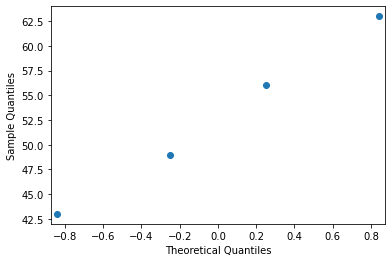

In [7]:
import numpy as np
import statsmodels.api as sm
import pylab as py
age_quant= pd. DataFrame()
now = pd.Timestamp('now')
age_quant['Age'] = (now - pd.to_datetime(df_PA['DateOfBirth'], format='%m%d%y')).astype('<m8[Y]')
age_quant
age_quant1 = age_quant.quantile([.25, .5, .75 , 1.00])
print(age_quant1)

split_quantiles = np.array(age_quant1)    
  
sm.qqplot(split_quantiles)
py.show()

<span style="color:#00008B;"> Qs 45: Usage of Enumeration in Python with any example. </span>

<span style="color:  #00008B;"> Qs 46: Count of canceled status. </span>

In [8]:
canceled_status = len(df_AmbV[df_AmbV['VisitStatus'] == 'Canceled'])

print("Number of patients whose visit status are canceled: ",canceled_status)

Number of patients whose visit status are canceled:  60


<span style="color:#00008B;"> Qs 47: Display the patient details with maximum pulse pressure. </span>

In [46]:
#max_pulse = df_AmbV[df_AmbV['Pulse']].groupby('Patient_ID').max().index()
#max_pulse= df_AmbV.loc[df_AmbV['Pulse'].idxmax()]
max_pulse = df_AmbV.groupby(['PatientMRN'], as_index=True)['Pulse'].max()
max_pulse.max()

99.98646314

<span style="color:#00008B;"> Qs 48:  Create a heat map to show the correlation between the column values of Edvisits. </span>

<AxesSubplot:title={'center':'Correlation Heatmap'}>

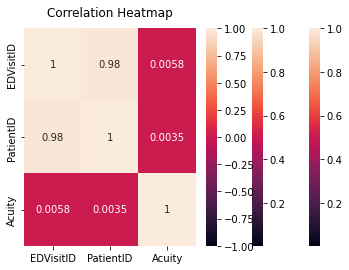

In [9]:
import seaborn as sns
df_ED = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDVisits")
df_ED.corr()
sns.heatmap(df_ED.corr());
sns.heatmap(df_ED.corr()).set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
sns.heatmap(df_ED.corr(), vmin=-1, vmax=1, annot=True)


<span style="color:#00008B;"> Qs 49:  Plot a graph by counting the no. of patients in each department. </span>

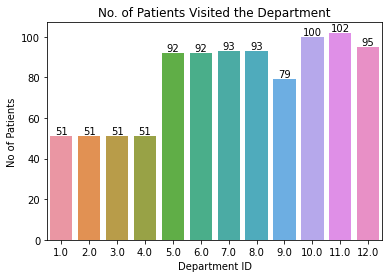

In [10]:
PI=sns.countplot(x='VisitDepartmentID',data=df_AmbV)
PI.bar_label(PI.containers[0],label_type='edge')
plt.title('No. of Patients Visited the Department')
plt.xlabel('Department ID') and plt.ylabel('No of Patients')

plt.show()


<span style="color:#00008B;"> Qs 50:  Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more. </span>

In [50]:
reasonforvisit = df_ED[['PatientID', 'ReasonForVisit', 'Acuity']].loc[((df_ED['ReasonForVisit'] == 'Migraine') | (df_ED['ReasonForVisit'] == 'Pneumonia')) & (df_ED['Acuity'] >= 2)]
reasonforvisit

,PatientID,ReasonForVisit,Acuity
1,12.0,Migraine,2.0
3,14.0,Migraine,3.0
11,29.0,Pneumonia,2.0
12,30.0,Pneumonia,3.0
13,31.0,Pneumonia,4.0
...,...,...,...
1107,773.0,Migraine,2.0
1150,850.0,Migraine,2.0
1152,852.0,Migraine,2.0
1160,868.0,Migraine,2.0


<span style="color:#00008B;"> Qs 51:  Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit. </span>

In [ ]:
iter.rows

<span style="color:#00008B;"> Qs 52  Using indexing , loc to retrieve the row with maximum BloodPressureSystolic. </span>

In [52]:
df_AmbV.loc[df_AmbV[df_AmbV['BloodPressureSystolic']==df_AmbV['BloodPressureSystolic'].max()].index]

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
236,933.0,884.0,27.0,2019-02-14,2019-01-22 19:26:49.163,12.0,Telemedicine,190.0,143.989174,74.976879,Completed
251,888.0,906.0,24.0,2019-03-31,2019-03-17 23:21:17.361,10.0,New,190.0,137.207999,52.666922,Completed
424,314.0,63.0,7.0,2019-04-05,2019-03-24 22:31:26.092,11.0,Telemedicine,190.0,121.539859,95.471260,Completed
432,740.0,892.0,31.0,2019-03-14,2019-03-11 15:08:33.963,8.0,Physical,190.0,145.343479,94.849021,Completed
677,929.0,880.0,23.0,2019-02-10,2019-01-22 13:32:14.549,8.0,Follow Up,190.0,144.313400,82.781940,Completed
869,839.0,857.0,12.0,2019-03-17,2019-02-23 09:05:43.676,8.0,Follow Up,190.0,130.997386,71.829542,Completed
934,482.0,866.0,14.0,2019-05-04,2019-04-13 07:54:49.580,5.0,New,190.0,124.736359,69.731779,Canceled


<span style="color:#00008B;"> Qs 53: Plot a graph by multiplotting on the same canvas . </span>

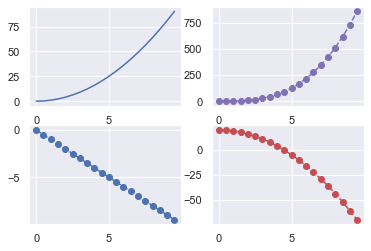

In [76]:
x =np.arange(0,10,0.5) 
y1 = x*x
y2= x*x*x
y3= -1*x
y4= -x*x +20
fig, axes = plt.subplots(2, 2)  
axes[0, 0].plot(x, y1, '-') 
axes[0, 1].plot(x, y2, 'm--o') 
axes[1, 0].plot(x, y3, 'b--o') 
axes[1, 1].plot(x, y4, 'r--o')

<span style="color:#00008B;"> Qs 54: Retrieve the row with minimum DBP using sorting technique. </span> 

In [77]:
df_AmbV.sort_values("BloodPressureDiastolic", ascending=True).head(1)
#df_AmbV.nsmallest(1, "BloodPressureDiastolic") (#smallest value function)


,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163.0,801.0,11.0,2019-02-08,2019-02-07 23:41:12.181,7.0,Follow Up,120.0,51.695653,53.310495,Completed


<span style="color:#00008B;">Qs 55: Replace all the null values in ReadmissionFlag with 0. </span> 

In [85]:
df = df_ReAd = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "ReAdmissionRegistry")
df.fillna(value = 0,inplace = True)
# Show the DataFrame
df.head()



,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389.0,1.0,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,0.0,0.0
1,635.0,2.0,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606.0,3.0,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587.0,5.0,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640.0,6.0,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,0.0,0.0


<span style="color:#00008B;">Qs 56: Get the list of patient ID's which are not there in ReadmissionRegistry. </span> 

<span style="color:#00008B;">Qs 57: Find reasonForVisit with highest count of acuity 5 patients. </span> 

In [86]:
dq1= df_ED[df_ED['Acuity']==5]
dq1.max()

EDVisitID                              1196.0
PatientID                               942.0
VisitDate          2020-01-15 15:21:46.794000
EDDischargeTime    2020-01-16 07:50:27.840000
Acuity                                    5.0
ReasonForVisit            Shortness of Breath
EDDisposition                      Discharged
dtype: object

<span style="color:#00008B;">Qs 58: Display full name of patients who are born in 1986.</span> 

<span style="color:#00008B;">Qs 59:Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.</span> 

<span style="color:#00008B;"> Qs 60:Create a heat map on Readmission Registry table to find correlation between columns values.</span> 

<AxesSubplot:title={'center':'Correlation Heatmap'}>

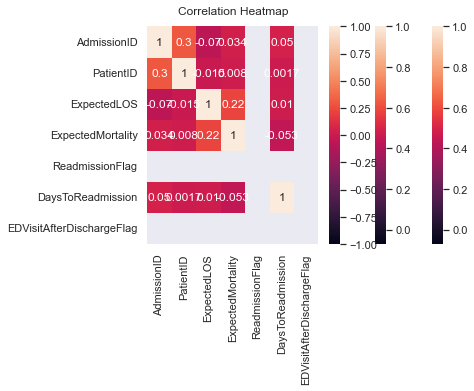

In [91]:
# import seaborn as sns
# df_ReAd = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "ReAdmissionRegistry")
df_ReAd.corr()
sns.heatmap(df_ReAd.corr());
sns.heatmap(df_ReAd.corr()).set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
sns.heatmap(df_ReAd.corr(), vmin=-1, vmax=1, annot=True)